In [24]:
# 03_team_stats_explorer.ipynb
# 🏀 Team Stats Explorer

# Requirements: pandas, matplotlib, seaborn (install via `pip install pandas matplotlib seaborn`)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display

DATA_DIR = Path("./data")

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = [14, 7]
sns.set_palette("mako")
pd.options.display.float_format = "{:.2f}".format

print("Data directory:", DATA_DIR.resolve())


Data directory: /home/bluescar/jupyter/cbb/starter_pack/artifacts/data


# 🧭 What You'll Do

> **Beginner tip:** Work top-to-bottom. After each chart renders, pause to describe what you see in plain language—saying it out loud reinforces what every metric means.

This notebook turns the finalized team datasets into quick exploratory views. You'll:
- locate available seasons and pick one to study
- slice team season totals into per-game metrics and rankings
- compare conferences and pace/efficiency relationships
- inspect home/road/neutral splits with game-level data
- chart a single team's momentum across the season


In [25]:
# 📅 Discover available seasons
season_files = sorted(p.stem for p in (DATA_DIR / "team_season_stats").glob('*.csv'))
print(f"Available seasons ({len(season_files)}):")
print(', '.join(season_files[:10]))
if len(season_files) > 10:
    print('…')
    print(', '.join(season_files[-5:]))


Available seasons (21):
2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014
…
2021, 2022, 2023, 2024, 2025


## 🛠️ Choose your filters
Try the default season first. Once the outputs feel comfortable, switch the conference to one you know well and rerun the notebook to see how the stories change.

Update the season (and optional conference) below, then re-run the notebook.


In [26]:
# 🔁 Set parameters
TARGET_SEASON = 2025  # change to any season in the list above
TARGET_CONFERENCE = None  # e.g. 'Big Ten' or None for all conferences

print(f"Analyzing season: {TARGET_SEASON}")
print(f"Conference filter: {TARGET_CONFERENCE or 'All'}")


Analyzing season: 2025
Conference filter: All


In [27]:
# 📥 Load team season + game data
team_season_path = DATA_DIR / 'team_season_stats' / f'{TARGET_SEASON}.csv'
team_game_path = DATA_DIR / 'team_game_stats' / f'{TARGET_SEASON}.csv'

team_season = pd.read_csv(team_season_path)
team_games = pd.read_csv(team_game_path).dropna(subset=['conference'])  # drop non-D1 games

if TARGET_CONFERENCE:
    team_season = team_season[team_season['conference'] == TARGET_CONFERENCE].copy()
    team_games = team_games[team_games['conference'] == TARGET_CONFERENCE].copy()

print(f"Season rows: {len(team_season):,}")
print(f"Game rows: {len(team_games):,}")
team_season.head()


Season rows: 364
Game rows: 12,042


/tmp/ipykernel_45517/1378369994.py:6: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  team_games = pd.read_csv(team_game_path).dropna(subset=['conference'])  # drop non-D1 games


,season,seasonLabel,teamId,team,conference,games,wins,losses,totalMinutes,pace,...,opponentStats_fourFactors_freeThrowRate,opponentStats_fourFactors_offensiveReboundPct,opponentStats_fourFactors_turnoverRatio,opponentStats_fourFactors_effectiveFieldGoalPct,opponentStats_assists,opponentStats_blocks,opponentStats_steals,opponentStats_possessions,opponentStats_rating,opponentStats_trueShooting
0,2025,20242025,1,Abilene Christian,WAC,32,16,16,1310,66.40,...,49.30,29.10,0.25,50.00,383,143,259,2172,103.50,55.20
1,2025,20242025,2,Air Force,Mountain West,32,4,28,1310,61.10,...,35.40,26.80,0.16,54.60,410,103,217,1999,117.90,58.00
2,2025,20242025,3,Akron,MAC,35,28,7,1415,69.10,...,32.10,30.60,0.18,49.40,418,88,246,2445,107.40,53.30
3,2025,20242025,4,Alabama A&M,SWAC,32,10,22,1320,61.50,...,47.00,30.90,0.25,53.10,484,97,289,2025,124.50,57.50
4,2025,20242025,5,Alabama,SEC,37,28,9,1510,74.50,...,33.20,33.90,0.14,47.80,480,153,288,2813,106.90,52.00


## 📊 Season snapshot
Focus on the summary table and the first bar chart. Which teams lead in points per game? Does that match what you expected from watching games?

Create per-game metrics and quick rankings from the season totals.


In [28]:
# 🔢 Build summary metrics per team
season_summary = (
    team_season
    .assign(
        win_pct=lambda df: df['wins'].div(df['games'].clip(lower=1)),
        points_per_game=lambda df: df['teamStats_points_total'].div(df['games'].clip(lower=1)),
        opp_points_per_game=lambda df: df['opponentStats_points_total'].div(df['games'].clip(lower=1)),
        net_rating=lambda df: df['teamStats_rating'] - df['opponentStats_rating'],
    )
)

season_leaderboard = season_summary[['team', 'conference', 'games', 'wins', 'win_pct', 'points_per_game', 'teamStats_rating', 'net_rating']].sort_values('teamStats_rating', ascending=False).head(10)
season_leaderboard


,team,conference,games,wins,win_pct,points_per_game,teamStats_rating,net_rating
69,Drake,MVC,35,31,0.89,69.83,130.90,20.80
161,McNeese,Southland,35,28,0.80,76.57,128.50,20.70
76,Eastern Illinois,OVC,31,12,0.39,66.52,127.80,-5.30
71,Duke,ACC,39,35,0.90,83.23,126.70,31.30
99,Georgia State,Sun Belt,33,14,0.42,75.12,126.50,-5.20
309,UC San Diego,Big West,35,30,0.86,79.34,125.90,28.00
320,UNC Wilmington,CAA,35,27,0.77,79.17,125.60,14.50
86,Florida,SEC,40,36,0.90,84.78,124.70,22.50
134,Kentucky,SEC,36,24,0.67,84.44,124.60,10.80
101,Gonzaga,WCC,35,26,0.74,86.40,124.50,23.90


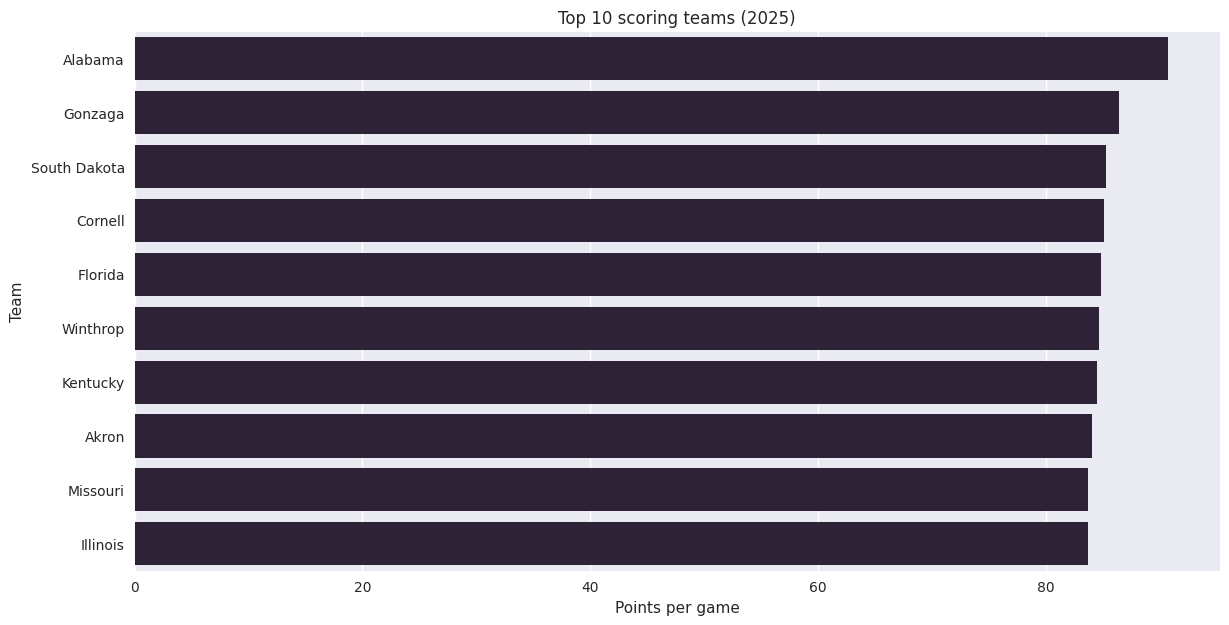

,team,conference,points_per_game,wins
4,Alabama,SEC,90.68,28
101,Gonzaga,WCC,86.40,26
268,South Dakota,Summit,85.21,19
59,Cornell,Ivy,85.07,18
86,Florida,SEC,84.78,36
353,Winthrop,Big South,84.68,23
134,Kentucky,SEC,84.44,24
2,Akron,MAC,84.03,28
176,Missouri,SEC,83.65,22
117,Illinois,Big Ten,83.63,22


In [31]:
# 🏀 Top offenses by points per game
top_scoring = season_summary.sort_values('points_per_game', ascending=False).head(10)
sns.barplot(data=top_scoring, x='points_per_game', y='team')
plt.title(f'Top 10 scoring teams ({TARGET_SEASON})')
plt.xlabel('Points per game')
plt.ylabel('Team')
plt.show()

top_scoring[['team', 'conference', 'points_per_game', 'wins']]


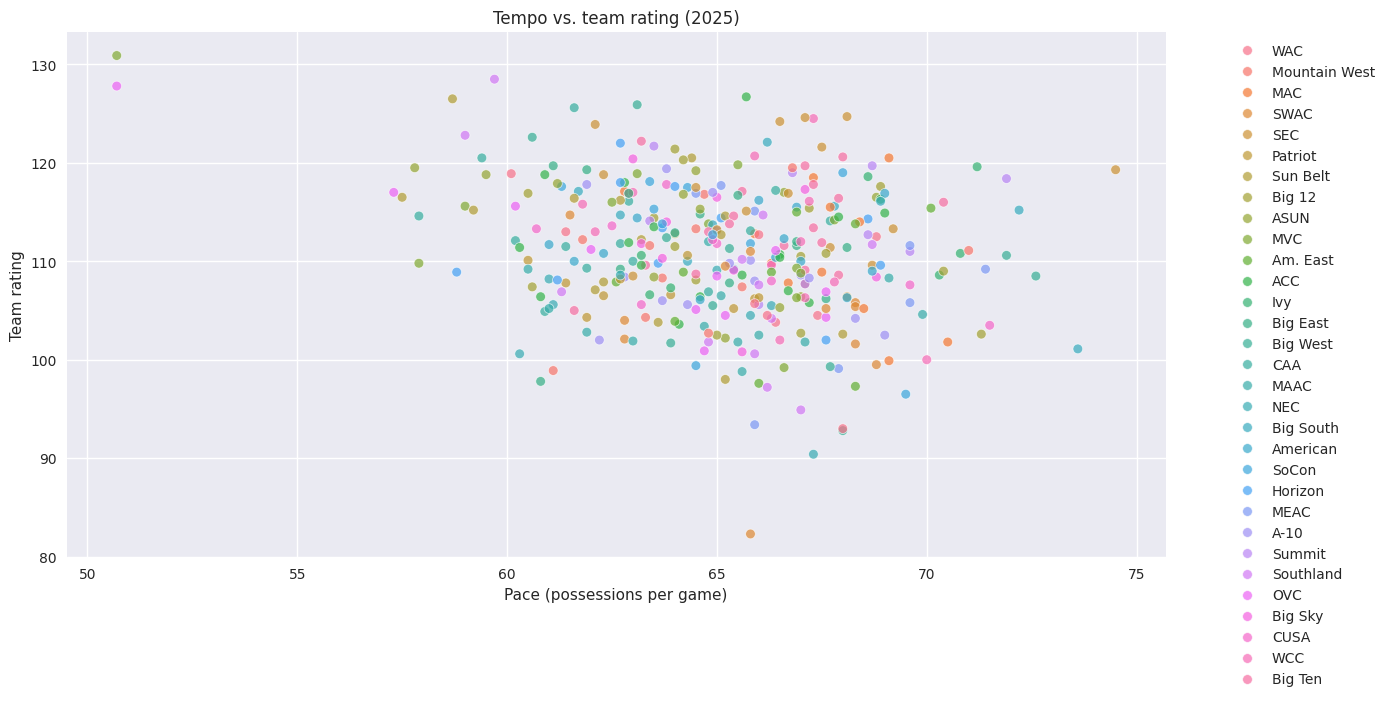

In [32]:
# ⏱️ Pace vs. efficiency
ax = sns.scatterplot(
    data=season_summary,
    x='pace',
    y='teamStats_rating',
    hue='conference',
    alpha=0.7
)
ax.set_title(f'Tempo vs. team rating ({TARGET_SEASON})')
ax.set_xlabel('Pace (possessions per game)')
ax.set_ylabel('Team rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 🏆 Conference benchmarks
These averages tell you how styles differ between leagues. If a conference has a much higher pace, consider how that might affect national rankings.

Aggregate season metrics to see how conferences stack up.


In [33]:
conference_summary = (
    season_summary
    .groupby('conference', as_index=False)
    .agg(
        teams=('team', 'count'),
        avg_rating=('teamStats_rating', 'mean'),
        avg_net_rating=('net_rating', 'mean'),
        avg_pace=('pace', 'mean'),
        avg_points=('points_per_game', 'mean')
    )
    .sort_values('avg_rating', ascending=False)
)

conference_summary.head(10)


,conference,teams,avg_rating,avg_net_rating,avg_pace,avg_points
23,SEC,16,116.81,9.91,66.67,78.96
27,Summit,9,114.43,2.67,67.29,77.96
8,Big South,9,113.96,2.77,66.92,77.29
9,Big Ten,18,113.84,7.42,66.16,76.95
2,ASUN,12,113.61,-1.83,64.12,74.51
18,MVC,12,113.55,3.98,63.23,73.67
11,CAA,14,113.41,1.13,62.61,72.20
13,Horizon,11,112.55,1.09,64.26,74.32
7,Big Sky,10,112.55,2.51,64.85,73.74
14,Ivy,8,112.38,2.62,66.79,75.75


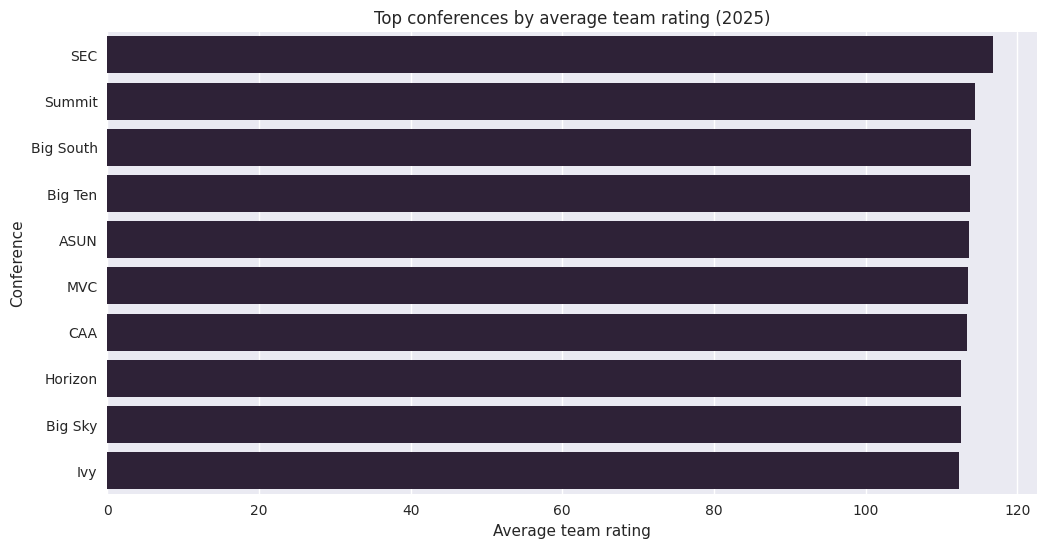

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=conference_summary.head(10), x='avg_rating', y='conference')
plt.title(f'Top conferences by average team rating ({TARGET_SEASON})')
plt.xlabel('Average team rating')
plt.ylabel('Conference')
plt.show()


## 🏠 Home / Road tendencies
Look at the location labels to understand where teams gain their edge. A big home/road gap could signal crowd impact or travel challenges.

Use game-level stats to compare how teams perform by location.


In [34]:
# 🧹 Prep game data with location labels
game_view = (
    team_games
    .assign(
        startDate=pd.to_datetime(team_games['startDate']),
        is_home=team_games['isHome'].astype(str).str.lower() == 'true',
        is_neutral=team_games['neutralSite'].astype(str).str.lower() == 'true',
    )
)

def label_location(row):
    if row['is_neutral']:
        return 'Neutral'
    return 'Home' if row['is_home'] else 'Road'

game_view['location'] = game_view.apply(label_location, axis=1)
game_view[['team', 'conference', 'location', 'teamStats_rating']].head()


,team,conference,location,teamStats_rating
0,IU Indianapolis,Horizon,Home,138.90
2,Middle Tennessee,CUSA,Home,129.30
3,Charleston,CAA,Neutral,118.40
4,Southern Illinois,MVC,Neutral,103.90
6,UT Arlington,WAC,Home,109.80


In [35]:
location_summary = (
    game_view
    .groupby(['team', 'location'], as_index=False)
    .agg(
        games=('gameId', 'count'),
        points_per_game=('teamStats_points_total', 'mean'),
        opp_points_per_game=('opponentStats_points_total', 'mean'),
        rating=('teamStats_rating', 'mean'),
        pace=('pace', 'mean'),
    )
    .assign(point_diff=lambda df: df['points_per_game'] - df['opp_points_per_game'])
    .sort_values(['team', 'location'])
)

location_summary.head(12)


,team,location,games,points_per_game,opp_points_per_game,rating,pace,point_diff
0,Abilene Christian,Home,15,74.93,66.33,99.69,71.24,8.60
1,Abilene Christian,Neutral,2,72.50,71.50,106.25,68.75,1.00
2,Abilene Christian,Road,15,66.07,74.07,97.21,68.20,-8.00
3,Air Force,Home,16,63.38,72.56,98.11,63.98,-9.19
4,Air Force,Neutral,2,64.00,64.50,89.40,66.00,-0.50
5,Air Force,Road,14,60.00,76.21,93.44,64.04,-16.21
6,Akron,Home,16,88.31,71.94,124.82,70.78,16.38
7,Akron,Neutral,7,77.71,78.29,106.83,73.14,-0.57
8,Akron,Road,12,82.00,77.17,114.21,72.59,4.83
9,Alabama,Home,15,91.27,75.93,118.95,76.70,15.33


In [36]:
# 📈 Biggest home court edges
location_pivot = location_summary.pivot_table(index='team', columns='location', values='point_diff').fillna(0)
home_col = location_pivot['Home'] if 'Home' in location_pivot else pd.Series(0, index=location_pivot.index)
road_col = location_pivot['Road'] if 'Road' in location_pivot else pd.Series(0, index=location_pivot.index)
location_pivot['home_vs_road_gap'] = home_col.sub(road_col, fill_value=0)
location_pivot.sort_values('home_vs_road_gap', ascending=False).head(10)


location,Home,Neutral,Road,home_vs_road_gap
team,,,,
Florida A&M,15.08,-3.00,-14.25,29.33
Delaware State,19.23,4.67,-9.50,28.73
Texas A&M-Corpus Christi,21.88,5.50,-6.53,28.42
Tarleton State,8.85,-7.25,-19.20,28.05
Morgan State,13.00,-1.00,-14.53,27.53
Utah,13.79,-7.25,-13.60,27.39
Kansas City,18.21,7.00,-8.71,26.93
Baylor,19.94,-2.43,-6.75,26.69
Mississippi Valley State,-9.55,0.00,-36.15,26.60


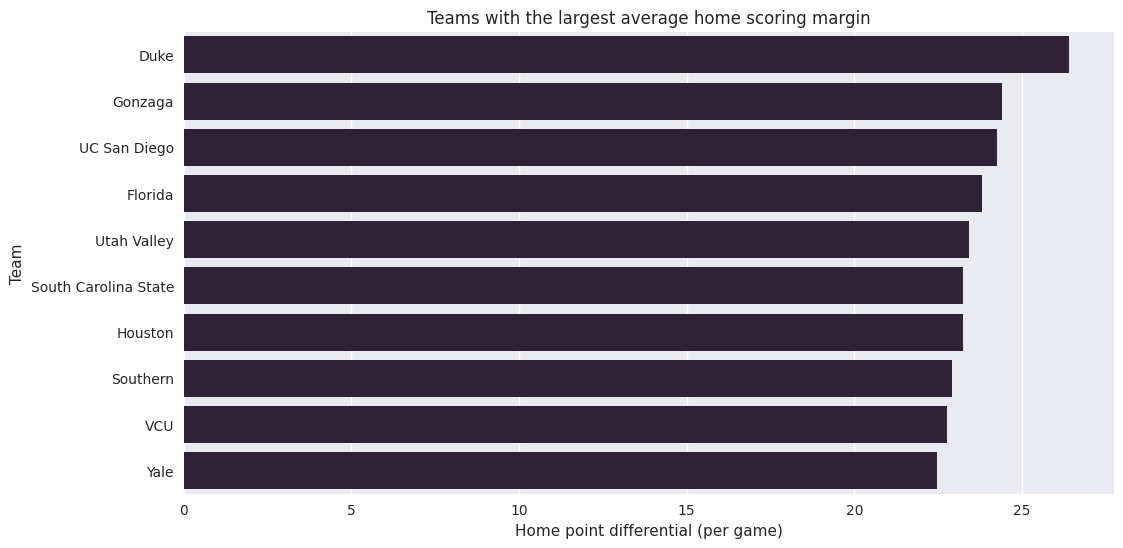

In [37]:
plt.figure(figsize=(12, 6))
top_gaps = (
    location_summary
    .query('location == "Home"')
    .nlargest(10, 'point_diff')
)
sns.barplot(data=top_gaps, x='point_diff', y='team')
plt.title('Teams with the largest average home scoring margin')
plt.xlabel('Home point differential (per game)')
plt.ylabel('Team')
plt.show()


## 📈 Track a single team
If the rolling trend moves upward, the team improved over the season. Try swapping `FOCUS_TEAM` to another program you follow and compare the shapes.

Change the `FOCUS_TEAM` below to chart game-by-game ratings and a rolling trend.


,startDate,location,teamStats_rating,rolling_rating,point_margin
11398,2025-03-05 05:00:00+00:00,Home,115.40,110.70,8.00
11650,2025-03-08 05:00:00+00:00,Road,123.40,110.94,3.00
12235,2025-03-15 03:30:00+00:00,Neutral,89.50,108.26,-5.00
12346,2025-03-20 03:00:00+00:00,Neutral,126.50,109.94,7.00
12427,2025-03-22 19:30:00+00:00,Road,112.50,113.46,-15.00


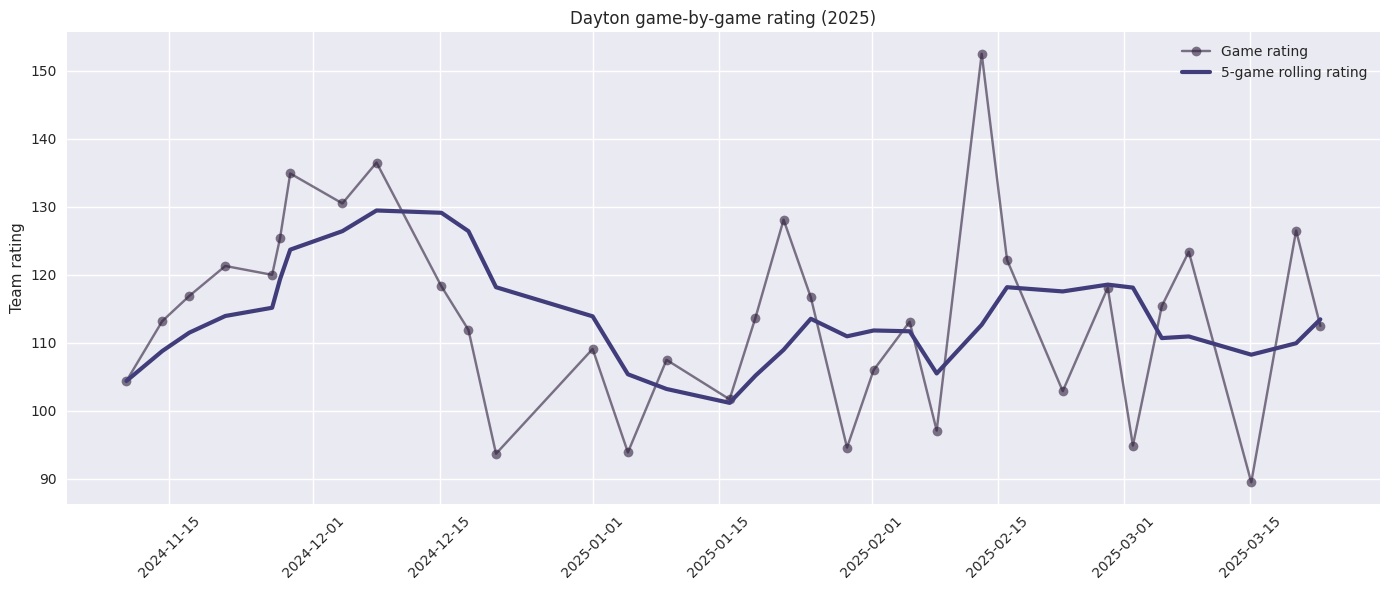

In [38]:
FOCUS_TEAM = 'Dayton'

focus_games = (
    game_view[game_view['team'] == FOCUS_TEAM]
    .sort_values('startDate')
    .assign(
        rolling_rating=lambda df: df['teamStats_rating'].rolling(window=5, min_periods=1).mean(),
        point_margin=lambda df: df['teamStats_points_total'] - df['opponentStats_points_total'],
    )
)

if focus_games.empty:
    print(f'No games found for {FOCUS_TEAM} in {TARGET_SEASON}. Try another team.')
else:
    display(focus_games[['startDate', 'location', 'teamStats_rating', 'rolling_rating', 'point_margin']].tail())

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(focus_games['startDate'], focus_games['teamStats_rating'], marker='o', alpha=0.6, label='Game rating')
    ax.plot(focus_games['startDate'], focus_games['rolling_rating'], linewidth=3, label='5-game rolling rating')
    ax.set_title(f'{FOCUS_TEAM} game-by-game rating ({TARGET_SEASON})')
    ax.set_ylabel('Team rating')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## ✅ Next ideas
Use the insights you jot down here to guide deeper dives—did a team with slow pace still score efficiently? Flag it for follow-up in later notebooks.

- Export `season_summary` or `location_summary` to CSV for downstream dashboards
- Blend in `team_season_shooting_stats` to analyze shot mix alongside pace and rating
